# NLP (Natural language processing )
This is my first example of NLP, is composed of commentaries of movies, classified into two categories, negative and positive.

## Importing the data

In [1]:
import os 

imdb_dir = r'C:\Users\sebastian sossa\Documents\deepLearning\text\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
text = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        print(fname)
        if  fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), 'r', encoding="utf-8")
            text.append(f.read())
            f.close()

            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)



0_2.txt
10000_4.txt
10001_1.txt
10002_3.txt
10003_3.txt
10004_2.txt
10005_2.txt
10006_2.txt
10007_4.txt
10008_4.txt
10009_3.txt
1000_3.txt
10010_2.txt
10011_1.txt
10012_1.txt
10013_4.txt
10014_2.txt
10015_4.txt
10016_3.txt
10017_1.txt
10018_1.txt
10019_1.txt
1001_4.txt
10020_1.txt
10021_3.txt
10022_4.txt
10023_4.txt
10024_3.txt
10025_2.txt
10026_3.txt
10027_1.txt
10028_3.txt
10029_1.txt
1002_3.txt
10030_3.txt
10031_2.txt
10032_1.txt
10033_1.txt
10034_1.txt
10035_1.txt
10036_1.txt
10037_1.txt
10038_4.txt
10039_1.txt
1003_4.txt
10040_2.txt
10041_1.txt
10042_1.txt
10043_1.txt
10044_2.txt
10045_1.txt
10046_4.txt
10047_1.txt
10048_1.txt
10049_1.txt
1004_4.txt
10050_4.txt
10051_2.txt
10052_4.txt
10053_4.txt
10054_3.txt
10055_1.txt
10056_1.txt
10057_1.txt
10058_2.txt
10059_1.txt
1005_2.txt
10060_3.txt
10061_4.txt
10062_4.txt
10063_1.txt
10064_2.txt
10065_1.txt
10066_1.txt
10067_4.txt
10068_3.txt
10069_3.txt
1006_3.txt
10070_3.txt
10071_2.txt
10072_1.txt
10073_3.txt
10074_3.txt
10075_3.txt
100

In [2]:
#Example of the first comentary
print(text[0])

Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.


## Tokenizing the data 
In this case we going to use a pretrained wrord embedding, because this is more useful on problems where little training data is available

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

In [4]:
#Cuts off reviews after 100 words 
maxlen = 100

#Trains on 200 samples 
training_samples = 200

#Validates on 10.000 samples
validation_samples= 10000

#Consideres only the top 10.000 words in the dataset
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

word_index = tokenizer.word_index
print('Found %s unique tokens. ' %len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asanyarray(labels)
print('Shape of data tensor: ', data.shape)
print('Shape of label tensor: ', labels.shape)

#splits the data into a training set and a validation set, but first shuffles the data, because you are starting with data in wich samples are ordered 
#(all negative first, then all positive)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 72633 unique tokens. 
Shape of data tensor:  (17243, 100)
Shape of label tensor:  (17243,)


Example of the first 10 letters, and how was tokenized

In [5]:
# This is how letters of the datasets are decode
mexe = 10
counter = 0

for i, keys in word_index.items():
    if counter < mexe:
        print(keys, i)
        counter += 1

    else:
         break


1 the
2 a
3 and
4 of
5 to
6 br
7 is
8 in
9 i
10 it


## Using GloVe embeddings
We install the GloVe precompured embedding, and we use it into our model ( it has 100-dimensional embedding vectors for 400.000 words)

In [6]:
glove_dir = r'C:\Users\sebastian sossa\Documents\deepLearning\text\glove'

embeddings_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), 'r', encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Next we going to build an embedding matrix that you can load into an embedding layer

In [7]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

(10000, 100)


## Defining a model 

In [8]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [9]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


Next we going to load the GloVe embeddings in the model

In [10]:
model.layers[0].set_weights([embedding_matrix])
# This is to freeze the embedding layer (Not learn from  train)
model.layers[0].trainable= False

## Training and evaluating
Compile and train the model

In [11]:
model.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])

history = model.fit(x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 138ms/step - loss: 1.5768 - acc: 0.6000 - val_loss: 0.6165 - val_acc: 0.7254
Epoch 2/10
7/7 [==============================] - 1s 116ms/step - loss: 0.4038 - acc: 0.8550 - val_loss: 0.9811 - val_acc: 0.3013
Epoch 3/10
7/7 [==============================] - 1s 143ms/step - loss: 0.2645 - acc: 0.8800 - val_loss: 0.6731 - val_acc: 0.7254
Epoch 4/10
7/7 [==============================] - 1s 116ms/step - loss: 0.1653 - acc: 0.9600 - val_loss: 0.6386 - val_acc: 0.6379
Epoch 5/10
7/7 [==============================] - 1s 110ms/step - loss: 0.1854 - acc: 0.9150 - val_loss: 1.4201 - val_acc: 0.7252
Epoch 6/10
7/7 [==============================] - 1s 110ms/step - loss: 0.1266 - acc: 0.9600 - val_loss: 0.7142 - val_acc: 0.7248
Epoch 7/10
7/7 [==============================] - 1s 114ms/step - loss: 0.0540 - acc: 1.0000 - val_loss: 0.6291 - val_acc: 0.6570
Epoch 8/10
7/7 [==============================] - 1s 124ms/step - loss: 0.0487 - acc: 1.00

## PLotting the accuracy and loss

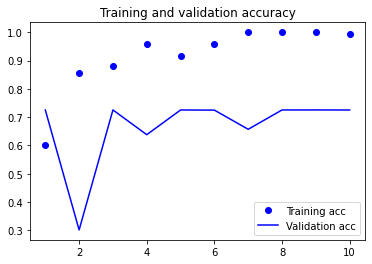

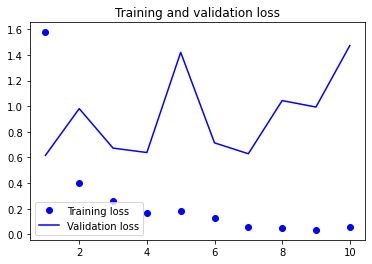

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model shows a clearli overfiting pattern, because the small number of training samples 

## Training the same model without pretrained word embeddings


In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])

history = model.fit(x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 134ms/step - loss: 0.6770 - acc: 0.6300 - val_loss: 0.6544 - val_acc: 0.7245
Epoch 2/10
7/7 [==============================

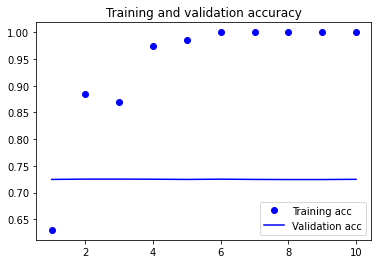

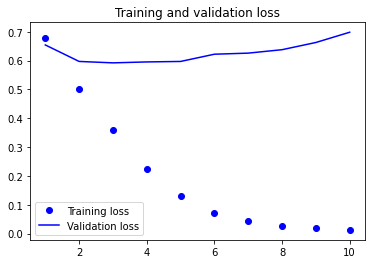

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()